In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from path import Path
import numpy as np


In [22]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
# Load data
file_path=Path("chocolate_encoded_countries.csv")
chocolate_df = pd.read_csv(file_path)
chocolate_df.drop(columns=chocolate_df.columns[0], axis=1, inplace = True)
chocolate_df.head()

,company_location,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
0,1,5,76.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
1,1,3,76.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2,1,7,76.0,3.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
3,2,2,63.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
4,2,7,70.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar


In [24]:
#drop one chocolate bar with rating 1
chocolate_df = chocolate_df[chocolate_df.rating > 1] 

In [25]:
#get dummies for string characters
X = pd.get_dummies(chocolate_df, columns=['cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar','sweetener_without_sugar']).drop('rating', axis=1)

# Create target
y = chocolate_df['rating']
X.head()

,company_location,country_of_bean_origin,cocoa_percent,counts_of_ingredients,cocoa_butter_have_cocoa_butter,cocoa_butter_have_not_cocoa_butter,vanilla_have_not_vanila,vanilla_have_vanila,lecithin_have_lecithin,lecithin_have_not_lecithin,salt_have_not_salt,salt_have_salt,sugar_have_not_sugar,sugar_have_sugar,sweetener_without_sugar_have_not_sweetener_without_sugar,sweetener_without_sugar_have_sweetener_without_sugar
0,1,5,76.0,3,1,0,1,0,0,1,1,0,0,1,1,0
1,1,3,76.0,3,1,0,1,0,0,1,1,0,0,1,1,0
2,1,7,76.0,3,1,0,1,0,0,1,1,0,0,1,1,0
3,2,2,63.0,4,1,0,1,0,1,0,1,0,0,1,1,0
4,2,7,70.0,4,1,0,1,0,1,0,1,0,0,1,1,0


In [26]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=77)

In [28]:
#scale down the Cocoa Percent, since the values are so much bigger than any other column

sc = StandardScaler()

sc.fit(X_train['cocoa_percent'].values.reshape(-1, 1))

X_train['cocoa_percent'] = sc.transform(X_train['cocoa_percent'].values.reshape(-1, 1))
X_test['cocoa_percent'] = sc.transform(X_test['cocoa_percent'].values.reshape(-1, 1))

X_train.head()

C:\Users\lerah\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\lerah\Anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,company_location,country_of_bean_origin,cocoa_percent,counts_of_ingredients,cocoa_butter_have_cocoa_butter,cocoa_butter_have_not_cocoa_butter,vanilla_have_not_vanila,vanilla_have_vanila,lecithin_have_lecithin,lecithin_have_not_lecithin,salt_have_not_salt,salt_have_salt,sugar_have_not_sugar,sugar_have_sugar,sweetener_without_sugar_have_not_sweetener_without_sugar,sweetener_without_sugar_have_sweetener_without_sugar
1382,7,7,0.627925,3,1,0,1,0,0,1,1,0,0,1,1,0
66,1,3,-0.300128,3,1,0,1,0,0,1,1,0,0,1,1,0
1821,1,7,0.256704,4,1,0,0,1,0,1,1,0,0,1,1,0
426,7,7,-1.228181,3,1,0,1,0,0,1,1,0,0,1,1,0
1702,3,2,-0.300128,3,1,0,1,0,0,1,1,0,0,1,1,0


In [8]:
#knn = KNeighborsClassifier(n_neighbors=2)
#knn.fit(X_train,y_train)

In [29]:
pred = knn.predict(X_test)


In [10]:

#print(confusion_matrix(y_test,pred))

In [11]:
#print(classification_report(y_test,pred))

In [30]:
error_rate = []
# Might take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

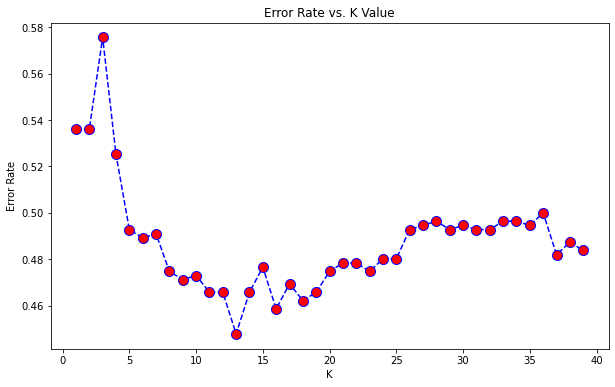

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [32]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [33]:
print(confusion_matrix(y_test,pred))

[[  0  44   0]
 [  0 289   0]
 [  0 223   0]]


In [34]:
pred = knn.predict(X_test)

In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         2.0       0.33      0.05      0.08        44
         3.0       0.57      0.74      0.64       289
         4.0       0.53      0.40      0.46       223

    accuracy                           0.55       556
   macro avg       0.48      0.40      0.39       556
weighted avg       0.53      0.55      0.52       556

